# 第六题
对一个实验谱数值曲线 p(x) ，自设 F(x)，分别用直接抽样和舍选法 对 p(x) 抽样。比较原曲线和抽样得到的曲线以验证。讨论抽样效率。
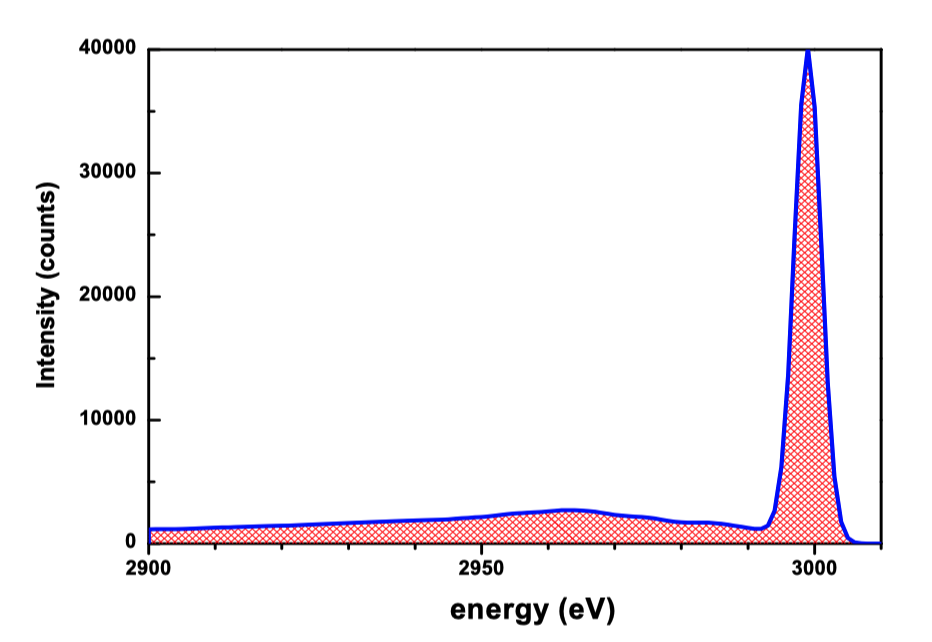

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
data = np.loadtxt('data.TXT')
data.shape
N = int(1e6)

# 直接采样

In [16]:
# Calculate PDF

pdf = []
count = np.zeros(data.shape[0])
s = 0
for d in data:
    s += d[1]
    pdf.append(s)
all_counts = np.max(pdf)
pdf = np.array(pdf) / all_counts


def binary(x):
    l = 0
    r = len(pdf)
    while True:
        m = (l + r) // 2
        try:
            assert m > 1
            if pdf[m] >= x and pdf[m - 1] < x:
                return m
            elif pdf[m] < x:
                l = m + 1
            else:
                r = m - 1
        except:
            return m


xi = np.random.rand(N)
for r in xi:
    index = binary(r)
    count[index] += 1

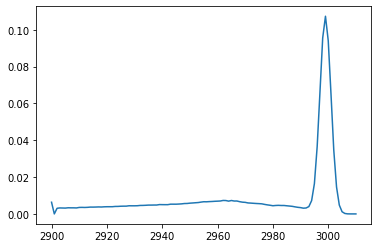

In [10]:
plt.plot(data[:, 0], count / N)

# 舍选抽样

In [21]:
count2 = np.zeros_like(count)
xi = np.random.rand(N)
y = np.random.rand(N)
x = []
for index, i in enumerate(xi):
    if i <= 0.009 * 94 / 2.606:
        j = int(i * 2.606 / 0.009)
        if y[index] <= data[j][1] / all_counts / 0.009:
            count2[j] += 1
    else:
        j = int((i * 2.606 - 0.846) / 0.11) + 94
        if y[index] <= data[j][1] / all_counts / 0.11:
            count2[j] += 1
print(np.sum(count2) / N)

0.383949


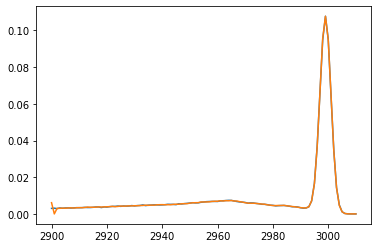

In [20]:
plt.plot(data[:, 0], count2 / np.sum(count2))
plt.plot(data[:, 0], count / N)
plt.show()